In [1]:
import re
import numpy as np
import pandas as pd
from sklearn import preprocessing, model_selection, naive_bayes, svm
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score
import matplotlib
from matplotlib import pyplot as plt
# import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import string
import csv
import random
import pickle
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from scipy.stats import linregress
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("dataset.csv", encoding='UTF-8', sep=";")
data.head(10)

,No.,User,Location,Tweets,Label,Dataset
0,1,KeselMikir_,Soerabaya,Apa iya #percumalaporpolisi kalau oknum sendir...,Sosial,Percuma Lapor Polisi
1,2,candiqq77Live,NaN,Nikmati Kemenangan Bersama Kami Di CandiQQ !\n...,Sosial,Percuma Lapor Polisi
2,3,katapematah,kepribadian standar ganda,"@isty_febryani Polisi baik ada, oknum polisi b...",Sosial,Percuma Lapor Polisi
3,4,kysmth__,RANDOM,ternyata bener #percumalaporpolisi barusan nge...,Sosial,Percuma Lapor Polisi
4,5,t3wfik,NaN,@ListyoSigitP Tapi tetep #percumalaporpolisi,Sosial,Percuma Lapor Polisi
5,6,toofuckingmad,NaN,Orang ini memang di rekrut untuk memancing emo...,Sosial,Percuma Lapor Polisi
6,7,imamyow,NaN,Nikmati Kemenangan Bersama Kami Di CandiQQ !\n...,Sosial,Percuma Lapor Polisi
7,8,ElFaruq04338685,NaN,Nikmati Kemenangan Bersama Kami Di CandiQQ !\n...,Sosial,Percuma Lapor Polisi
8,9,candiqq77Live,NaN,#Kapolri #PoldaJatim #PolrestabesSurabqya #Jok...,Sosial,Percuma Lapor Polisi
9,10,candiqq77Live,NaN,@isty_febryani Eh Gila Ya ISILOP.... Pak @List...,Sosial,Percuma Lapor Polisi


In [3]:
data['Label'].unique()

array(['Sosial', 'Infrastruktur', 'Kesehatan', 'Pendidikan'], dtype=object)

In [4]:
def hapus_karakter_selain_huruf(text):
    for sp in string.punctuation:
        text = text.replace(sp, " ")
    text = re.sub(r"\d+","",text)    
    return text.replace('/\s\s+/g', ' ')
data['Tweets'] = data['Tweets'].apply(hapus_karakter_selain_huruf)
data.head(10)

,No.,User,Location,Tweets,Label,Dataset
0,1,KeselMikir_,Soerabaya,Apa iya percumalaporpolisi kalau oknum sendir...,Sosial,Percuma Lapor Polisi
1,2,candiqq77Live,NaN,Nikmati Kemenangan Bersama Kami Di CandiQQ \n...,Sosial,Percuma Lapor Polisi
2,3,katapematah,kepribadian standar ganda,isty febryani Polisi baik ada oknum polisi b...,Sosial,Percuma Lapor Polisi
3,4,kysmth__,RANDOM,ternyata bener percumalaporpolisi barusan nge...,Sosial,Percuma Lapor Polisi
4,5,t3wfik,NaN,ListyoSigitP Tapi tetep percumalaporpolisi,Sosial,Percuma Lapor Polisi
5,6,toofuckingmad,NaN,Orang ini memang di rekrut untuk memancing emo...,Sosial,Percuma Lapor Polisi
6,7,imamyow,NaN,Nikmati Kemenangan Bersama Kami Di CandiQQ \n...,Sosial,Percuma Lapor Polisi
7,8,ElFaruq04338685,NaN,Nikmati Kemenangan Bersama Kami Di CandiQQ \n...,Sosial,Percuma Lapor Polisi
8,9,candiqq77Live,NaN,Kapolri PoldaJatim PolrestabesSurabqya Jok...,Sosial,Percuma Lapor Polisi
9,10,candiqq77Live,NaN,isty febryani Eh Gila Ya ISILOP Pak List...,Sosial,Percuma Lapor Polisi


In [5]:
data["Tweets"] = data["Tweets"].str.lower()

In [6]:
sw = ["di","apa", "ini","iya", "banget", "bgt", "sangat", "sgt" "agak", "agar","ada","adalah","adanya","adapun" ]

In [7]:
def stopwords(text):
    text = [word.lower() for word in text.split()] #berfungsi untuk casefolding
    for word in text:
        for stop in sw:
            if word==stop:
                text.remove(word)
    text = " ".join(text)
    text = re.sub(r'(.+?)\1+', r'\1',text)
    return text
data['Tweets'] = data['Tweets'].apply(stopwords)
data.head(10)

,No.,User,Location,Tweets,Label,Dataset
0,1,KeselMikir_,Soerabaya,iya percumalaporpolisi kalau oknum sendiri lin...,Sosial,Percuma Lapor Polisi
1,2,candiqq77Live,NaN,nikmati kemenangan bersama kami candiq langsun...,Sosial,Percuma Lapor Polisi
2,3,katapematah,kepribadian standar ganda,isty febryani polisi baik oknum polisi banyak ...,Sosial,Percuma Lapor Polisi
3,4,kysmth__,RANDOM,ternyata bener percumalaporpolisi barusan nger...,Sosial,Percuma Lapor Polisi
4,5,t3wfik,NaN,listyosigitp tapi tep percumalaporpolisi,Sosial,Percuma Lapor Polisi
5,6,toofuckingmad,NaN,orang memang rekrut untuk memancing emosional ...,Sosial,Percuma Lapor Polisi
6,7,imamyow,NaN,nikmati kemenangan bersama kami candiq langsun...,Sosial,Percuma Lapor Polisi
7,8,ElFaruq04338685,NaN,nikmati kemenangan bersama kami candiq langsun...,Sosial,Percuma Lapor Polisi
8,9,candiqq77Live,NaN,kapolri poldajatim polrestabesurabqya jokowi p...,Sosial,Percuma Lapor Polisi
9,10,candiqq77Live,NaN,isty febryani eh gila ya isilop pak listyosigi...,Sosial,Percuma Lapor Polisi


In [8]:
# import sys
# !{sys.executable} -m pip install Sastrawi
import Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()
def stemming(text):
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)
data['Tweets'] = data['Tweets'].apply(stemming)
data.head(10)

,No.,User,Location,Tweets,Label,Dataset
0,1,KeselMikir_,Soerabaya,iya percumalaporpolisi kalau oknum sendiri lin...,Sosial,Percuma Lapor Polisi
1,2,candiqq77Live,NaN,nikmat menang sama kami candiq langsung daftar...,Sosial,Percuma Lapor Polisi
2,3,katapematah,kepribadian standar ganda,isty febryani polisi baik oknum polisi banyak ...,Sosial,Percuma Lapor Polisi
3,4,kysmth__,RANDOM,nyata bener percumalaporpolisi barusan ngerasa...,Sosial,Percuma Lapor Polisi
4,5,t3wfik,NaN,listyosigitp tapi tep percumalaporpolisi,Sosial,Percuma Lapor Polisi
5,6,toofuckingmad,NaN,orang memang rekrut untuk pancing emosional la...,Sosial,Percuma Lapor Polisi
6,7,imamyow,NaN,nikmat menang sama kami candiq langsung daftar...,Sosial,Percuma Lapor Polisi
7,8,ElFaruq04338685,NaN,nikmat menang sama kami candiq langsung daftar...,Sosial,Percuma Lapor Polisi
8,9,candiqq77Live,NaN,kapolri poldajatim polrestabesurabqya jokowi p...,Sosial,Percuma Lapor Polisi
9,10,candiqq77Live,NaN,isty febryani eh gila ya isilop pak listyosigi...,Sosial,Percuma Lapor Polisi


In [9]:
NUM_WORDS = 1000
EMBEDDING_DIM = 16
MAXLEN = 120
PADDING = 'post'
OOV_TOKEN = "<OOV>"
TRAINING_SPLIT = .8

In [10]:
sentences = data['Tweets']
labels = data['Label']

print(f"There are {len(sentences)} sentences in the dataset.\n")
print(f"First sentence has {len(sentences[0].split())} words (after removing stopwords).\n")
print(f"There are {len(labels)} labels in the dataset.\n")
print(f"The first 5 labels are {labels[:5]}")

There are 990 sentences in the dataset.

First sentence has 12 words (after removing stopwords).

There are 990 labels in the dataset.

The first 5 labels are 0    Sosial
1    Sosial
2    Sosial
3    Sosial
4    Sosial
Name: Label, dtype: object


In [11]:
train_sentences, val_sentences, train_labels, val_labels = train_test_split(sentences, labels, 
                                                                                         test_size=0.2, 
                                                                                         random_state=42, 
                                                                                         stratify=data['Label'].values)

In [12]:
print(f"There are {len(train_sentences)} sentences for training.\n")
print(f"There are {len(train_labels)} labels for training.\n")
print(f"There are {len(val_sentences)} sentences for validation.\n")
print(f"There are {len(val_labels)} labels for validation.")

There are 792 sentences for training.

There are 792 labels for training.

There are 198 sentences for validation.

There are 198 labels for validation.


Vocabulary contains 5124 words

<OOV> token included in vocabulary


In [15]:
def remove_stopwords(sentence):
    # List of stopwords
    stopwords = ["di","apa", "ini","iya", "banget", "bgt", "sangat", "sgt" "agak", "agar","ada","adalah","adanya","adapun" ]
    
    # Sentence converted to lowercase-only
    sentence = sentence.lower()

    words = sentence.split()
    no_words = [w for w in words if w not in stopwords]
    sentence = " ".join(no_words)

    return sentence



In [57]:
# GRADED FUNCTION: fit_tokenizer
def fit_tokenizer(train_sentences, num_words, oov_token):
    
    ### START CODE HERE
    
    # Instantiate the Tokenizer class, passing in the correct values for num_words and oov_token
    tokenizer = Tokenizer(num_words = num_words, oov_token = oov_token)
    
    # Fit the tokenizer to the training sentences
    tokenizer.fit_on_texts(train_sentences)
    
    ### END CODE HERE
    
    return tokenizer

In [58]:
# Test your function
tokenizer = fit_tokenizer(train_sentences, 1000, OOV_TOKEN)
word_index = tokenizer.word_index

print(f"Vocabulary contains {len(word_index)} words\n")
print("<OOV> token included in vocabulary" if "<OOV>" in word_index else "<OOV> token NOT included in vocabulary")

Vocabulary contains 5124 words

<OOV> token included in vocabulary


In [17]:
# GRADED FUNCTION: seq_and_pad
def seq_and_pad(sentences, tokenizer, padding, maxlen):
    
    ### START CODE HERE
       
    # Convert sentences to sequences
    sequences = tokenizer.texts_to_sequences(sentences)
    
    # Pad the sequences using the correct padding and maxlen
    padded_sequences = pad_sequences(sequences, padding=padding, maxlen=maxlen)
    
    ### END CODE HERE
    
    return padded_sequences

In [18]:
# Test your function
train_padded_seq = seq_and_pad(train_sentences, tokenizer, PADDING, MAXLEN)
val_padded_seq = seq_and_pad(val_sentences, tokenizer, PADDING, MAXLEN)

print(f"Padded training sequences have shape: {train_padded_seq.shape}\n")
print(f"Padded validation sequences have shape: {val_padded_seq.shape}")

Padded training sequences have shape: (792, 120)

Padded validation sequences have shape: (198, 120)


In [88]:
print(train_padded_seq)
print(val_padded_seq)

[[  1   1 378 ...   0   0   0]
 [756   1   1 ...   0   0   0]
 [108 427 135 ...   0   0   0]
 ...
 [  1 147 257 ...   0   0   0]
 [  1 125 491 ...   0   0   0]
 [  1   1   1 ...   0   0   0]]
[[267  10 203 ...   0   0   0]
 [152   1   1 ...   0   0   0]
 [  1   1 284 ...   0   0   0]
 ...
 [505 166 569 ...   0   0   0]
 [  1   1   1 ...   0   0   0]
 [195 637 638 ...   0   0   0]]


In [19]:
# GRADED FUNCTION: tokenize_labels
def tokenize_labels(all_labels, split_labels):
    
    ### START CODE HERE
    
    # Instantiate the Tokenizer (no additional arguments needed)
    label_tokenizer = Tokenizer()
    
    # Fit the tokenizer on all the labels
    label_tokenizer.fit_on_texts(all_labels)
    
    # Convert labels to sequences
    label_seq = label_tokenizer.texts_to_sequences(split_labels)
    
    # Convert sequences to a numpy array. Don't forget to substact 1 from every entry in the array!
    label_seq_np = np.array(label_seq) - 1
    
    ### END CODE HERE
    
    return label_seq_np

In [156]:
print(labels)

0          Sosial
1          Sosial
2          Sosial
3          Sosial
4          Sosial
          ...    
985    Pendidikan
986    Pendidikan
987    Pendidikan
988    Pendidikan
989    Pendidikan
Name: Label, Length: 990, dtype: object


In [20]:
# Test your function
train_label_seq = tokenize_labels(labels, train_labels)
val_label_seq = tokenize_labels(labels, val_labels)

print(f"First 5 labels of the training set should look like this:\n{train_label_seq[:5]}\n")
print(f"First 5 labels of the validation set should look like this:\n{val_label_seq[:5]}\n")
print(f"Tokenized labels of the training set have shape: {train_label_seq.shape}\n")
print(f"Tokenized labels of the validation set have shape: {val_label_seq.shape}\n")

First 5 labels of the training set should look like this:
[[1]
 [0]
 [0]
 [2]
 [0]]

First 5 labels of the validation set should look like this:
[[0]
 [0]
 [0]
 [1]
 [1]]

Tokenized labels of the training set have shape: (792, 1)

Tokenized labels of the validation set have shape: (198, 1)



In [21]:
# GRADED FUNCTION: create_model
def create_model(num_words, embedding_dim, maxlen):
    
    tf.random.set_seed(123)
    
    ### START CODE HERE
    
    model = tf.keras.Sequential([ 
        tf.keras.layers.Embedding(num_words, embedding_dim, input_length = maxlen),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(64, activation = 'relu'),
        tf.keras.layers.Dense(4, activation = 'softmax')
    ])
    
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy']) 

    ### END CODE HERE

    return model


In [25]:
model = create_model(1000, EMBEDDING_DIM, MAXLEN)

history = model.fit(train_padded_seq, train_label_seq, epochs=50, validation_data=(val_padded_seq, val_label_seq))

Epoch 1/50
25/25 [==============================] - 1s 18ms/step - loss: 1.3315 - accuracy: 0.6048 - val_loss: 1.2655 - val_accuracy: 0.6111
Epoch 2/50
25/25 [==============================] - 0s 9ms/step - loss: 1.1820 - accuracy: 0.6098 - val_loss: 1.0776 - val_accuracy: 0.6111
Epoch 3/50
25/25 [==============================] - 0s 3ms/step - loss: 0.9960 - accuracy: 0.6098 - val_loss: 0.9231 - val_accuracy: 0.6111
Epoch 4/50
25/25 [==============================] - 0s 3ms/step - loss: 0.8974 - accuracy: 0.6098 - val_loss: 0.8812 - val_accuracy: 0.6111
Epoch 5/50
25/25 [==============================] - 0s 8ms/step - loss: 0.8735 - accuracy: 0.6098 - val_loss: 0.8721 - val_accuracy: 0.6111
Epoch 6/50
25/25 [==============================] - 0s 3ms/step - loss: 0.8716 - accuracy: 0.6098 - val_loss: 0.8698 - val_accuracy: 0.6111
Epoch 7/50
25/25 [==============================] - 0s 3ms/step - loss: 0.8706 - accuracy: 0.6098 - val_loss: 0.8677 - val_accuracy: 0.6111
Epoch 8/50
25/25 [=

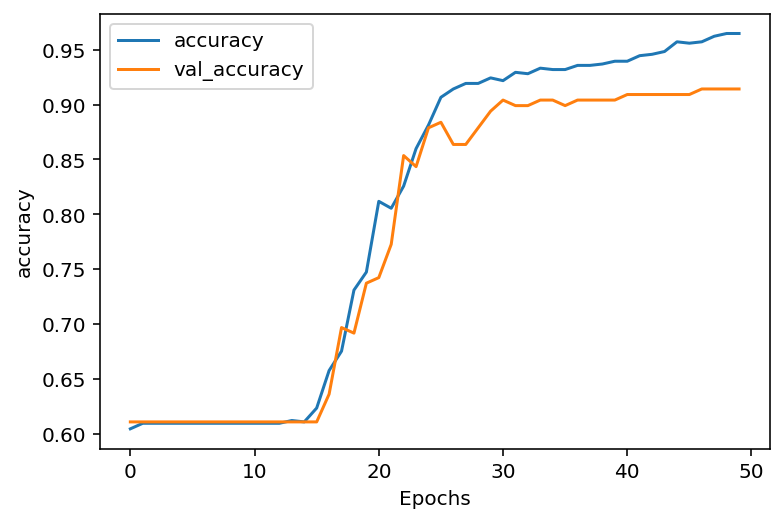

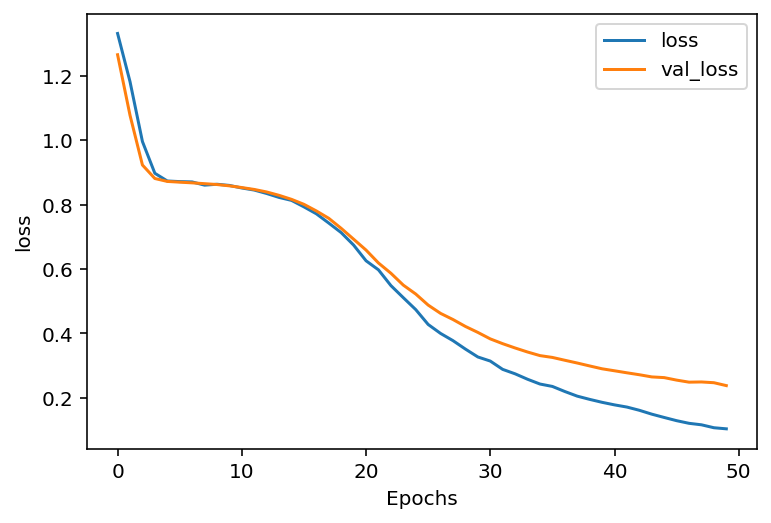

In [28]:
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history[f'val_{metric}'])
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, f'val_{metric}'])
    plt.show()
    
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [214]:
#databaru = pd.read_csv("databaru.csv", encoding='UTF-8', sep=";")
databaru = data[["Tweets"]][950:970].reset_index()
print(databaru)

    index                                             Tweets
0     950  wabah sakit mulut dan ku pmk yg serang hewan t...
1     951  fod cris sat telah jadi isu global dan sebab k...
2     952  kurban sebentar lagi tapi kok sekarang muncul ...
3     953  pelaksanan sembelih hewan kurban tengah ancam ...
4     954  pemkab lumajang terus cari cara atas sebar sak...
5     955  webinar mitigasi lalu lintas ternak dan pelaks...
6     956  menteri tani pada mei juga keluar surat ederan...
7     957  pasuruan htps t co lspzschw ketua paguyuban da...
8     958  pemeriksan libat para medis dan tugas medis ve...
9     959  who angkat bicara kait heboh media sosial kait...
10    960  lek aku ta putus ga sekolah gp seng penting ga...
11    961  awal dari angka putus sekolah guna lah bagai p...
12    962  politik indonesia pengaruh oleh fintech dan ke...
13    963  kdrama menfes myung he youth of may sih udah d...
14    964  aku rasa aku ni memang layak jaga jodoh orang ...
15    965     edwitjs pa

In [215]:
padding = seq_and_pad(databaru["Tweets"], tokenizer, PADDING, MAXLEN)
output = model.predict(padding)
print(output)

databaru["Labels"]=""
print(databaru)
for x in databaru.index:
    print(output[x,].max())
    if output[x,].max() == output[x,0]:
        databaru["Labels"][x] = "Sosial"
    elif output[x,].max() == output[x,1]:
        databaru["Labels"][x] = "infrastruktur"
    elif output[x,].max() == output[x,2]:
        databaru["Labels"][x] = "Kesehatan"
    elif output[x,].max() == output[x,3]:
        databaru["Labels"][x] = "Pendidikan"
    else:
        print("a")
        
    



print(databaru)

1/1 [==============================] - 0s 17ms/step
[[0.00734369 0.10472161 0.67364776 0.21428695]
 [0.7079255  0.18572924 0.03284689 0.07349837]
 [0.01127088 0.24986856 0.5210344  0.21782616]
 [0.01359864 0.03751949 0.7191791  0.22970279]
 [0.01904092 0.11192879 0.61486906 0.25416124]
 [0.1891902  0.17671658 0.33709425 0.29699892]
 [0.00876409 0.03178888 0.7495615  0.20988557]
 [0.01205435 0.08521077 0.66942096 0.23331384]
 [0.03711467 0.11079799 0.5660143  0.286073  ]
 [0.07415858 0.1838778  0.44318083 0.29878277]
 [0.20434608 0.44688505 0.15878399 0.18998496]
 [0.11008234 0.2819045  0.33145157 0.27656165]
 [0.21375333 0.18031077 0.31061736 0.29531854]
 [0.21183695 0.472897   0.13957615 0.17568998]
 [0.0857764  0.14334495 0.45577183 0.3151069 ]
 [0.2111634  0.24815159 0.26906222 0.2716228 ]
 [0.06361995 0.07731957 0.54795665 0.31110385]
 [0.4864976  0.07138383 0.20141597 0.24070261]
 [0.07684044 0.04815254 0.5614583  0.3135487 ]
 [0.27715334 0.22824556 0.23545231 0.25914878]]
    ind

C:\Users\HP\AppData\Local\Temp/ipykernel_17460/654019439.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  databaru["Labels"][x] = "Kesehatan"
C:\Users\HP\AppData\Local\Temp/ipykernel_17460/654019439.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  databaru["Labels"][x] = "Sosial"
C:\Users\HP\AppData\Local\Temp/ipykernel_17460/654019439.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  databaru["Labels"][x] = "infrastruktur"
